In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression 


In [ ]:
other_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv'
df= pd.read_csv(other_path, header=None,)
df
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns= headers
print(df)

     symboling normalized-losses         make  ... city-mpg highway-mpg  price
0            3                 ?  alfa-romero  ...       21          27  13495
1            3                 ?  alfa-romero  ...       21          27  16500
2            1                 ?  alfa-romero  ...       19          26  16500
3            2               164         audi  ...       24          30  13950
4            2               164         audi  ...       18          22  17450
..         ...               ...          ...  ...      ...         ...    ...
200         -1                95        volvo  ...       23          28  16845
201         -1                95        volvo  ...       19          25  19045
202         -1                95        volvo  ...       18          23  21485
203         -1                95        volvo  ...       26          27  22470
204         -1                95        volvo  ...       19          25  22625

[205 rows x 26 columns]


In [ ]:
#dropping the rows with '?' in price columns which was treated as invalid data while computing mean

index_names = df[ df['price'] == '?' ].index
df.drop(index_names, inplace = True)

index_names= df[ df['horsepower'] == '?'].index
print(df.drop(index_names , inplace = True))


#Converting price and horse-power column to int64 datatype from object datatype
df['price']=pd.to_numeric(df['price'])
df['price'] = df['price'].astype('int')
print(df['price'].dtype)

df['horsepower'] = pd.to_numeric(df['horsepower'])

#Priting datatypes of the columns
print(df.dtypes)


#Determining how prices vary across drive-wheels and body-style

df_test=df[['drive-wheels','body-style','price']]

#Using groupby to group selected data based on drive-wheels and body-style
#The data is grouped into sub-categories(drive-wheels and body-style) and only prices of each sub-category is shown
df_grp=df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()
print(df_grp)



None
int64
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object
   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4     

In [ ]:
#Coverting the above DataFrame into a pivot table for easy read
df_pivot=df_grp.pivot(index='drive-wheels', columns='body-style')

#fill missing values with 0
df_pivot = df_pivot.fillna(0)
print(df_pivot)



                   price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000  10061.181818
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]


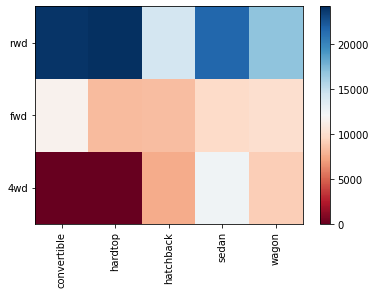

In [ ]:
#Representing pivot table using Heatmap

fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
#ANOVA TEST 

In [ ]:
#ANOVA on Honda and Suburu

#Extracting make and price data
df_anova=df[['make','price']]

#Group data by different makes
grouped_anova=df_anova.groupby(['make'])

# ANOVA for Honda and Subaru
f_val,p_val=stats.f_oneway(grouped_anova.get_group('honda')['price'],grouped_anova.get_group('subaru')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

#ANOVA on Honda and Jauguar
f_val,p_val=stats.f_oneway(grouped_anova.get_group('honda')['price'],grouped_anova.get_group('jaguar')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.19744030127462606 , P = 0.6609478240622193
ANOVA results: F= 400.925870564337 , P = 1.0586193512077862e-11


In [ ]:
#CORRELATION BETWEEN VARIABLES VS PRICE 

In [ ]:
#Defining a function evidence to know the significance of correlartion
def evidence():
  if p_value  <  0.001:
    print('there is strong evidence that the correlation is significant')
  elif p_value  <  0.05: 
    print('there is moderate evidence that the correlation is significant')
  elif p_value  <  0.1: 
    print('there is weak evidence that the correlation is significant')
  else: 
    print('there is no evidence that the correlation is significant')

In [ ]:
#Correlation between Horse-power vs price
pearson_coef, p_value=stats.pearsonr(df['length'],df['price'])
print('The correlation coefficient is', pearson_coef, 'with a P-value of', p_value)
print(evidence())


The correlation coefficient is 0.693964774564687 with a P-value of 6.398310603050564e-30
there is strong evidence that the correlation is significant
None


In [ ]:
#curb-weight vs price
pearson_coef, p_value=stats.pearsonr(df['curb-weight'],df['price'])
print('The correlation correlation is',pearson_coef,'with a p-value of',p_value)
print(evidence())




The correlation correlation is 0.8350904472742751 with a p-value of 5.017116685971367e-53
there is strong evidence that the correlation is significant
None


In [ ]:
#engine-size vs price
pearson_coef,p_value=stats.pearsonr(df['engine-size'],df['price'])
print('There is a correlation coefficient of',pearson_coef,'with a p-value of',p_value)
print(evidence())



There is a correlation coefficient of 0.8738869517981515 with a p-value of 1.265067447907604e-63
there is strong evidence that the correlation is significant
None


In [ ]:
#Highway-mpg vs price
pearson_coef,p_value= stats.pearsonr(df['highway-mpg'],df['price'])
print('There is a correlation of',pearson_coef,'with a p-value of',p_value)
print(evidence())


There is a correlation of -0.7052298604211744 with a p-value of 3.0087664257546088e-31
there is strong evidence that the correlation is significant
None


In [ ]:
#SINGLE AND MULTIPLE LINEAR REGRESSTION 

In [ ]:
#Creating linear  regression object using constructor 
lm=LinearRegression()

#Define predictor (X) and target variable (Y)
X= df[['highway-mpg']]
Y= df['price']

#Using method fit to fit the model ie. find parameters b0 and b1
lm.fit(X,Y)

#Obtaining a prediction
Yhat=lm.predict(X)
print(Yhat)

#Finding intercept and slope 
print(lm.intercept_)
print(lm.coef_)

[16269.37669013 16269.37669013 17090.88141229 13804.86252368
 20376.90030089 17912.38613444 17912.38613444 17912.38613444
 22019.90974519 14626.36724583 14626.36724583 15447.87196798
 15447.87196798 17912.38613444 20376.90030089 20376.90030089
 22019.90974519 -5089.74608579  3125.30113572  3125.30113572
  4768.31058002  7232.82474647 13804.86252368  7232.82474647
  7232.82474647  7232.82474647 13804.86252368 13804.86252368
 18733.89085659 -5911.25080794  7232.82474647  3946.80585787
 10518.84363508 10518.84363508 10518.84363508 10518.84363508
 11340.34835723 11340.34835723 11340.34835723 11340.34835723
 15447.87196798 12983.35780153 14626.36724583 14626.36724583
 22841.41446734 22841.41446734 24484.42391164 12983.35780153
  7232.82474647  7232.82474647  7232.82474647  7232.82474647
 19555.39557874 19555.39557874 19555.39557874 19555.39557874
 12161.85307938 12161.85307938 12161.85307938 12161.85307938
  3946.80585787 12161.85307938 16269.37669013  6411.32002432
 17912.38613444 17912.38

In [ ]:
"""
Relationship between price and highway-mpg 
Price = 38423.3058581574 - 821.73337832*highway-mpg
"""

'\nRelationship between price and highway-mpg \nPrice = 38423.3058581574 - 821.73337832*highway-mpg\n'

In [ ]:
#Multiple linear regression to predict prices based on horse-power, curb-weight, engine-size and highway-mpg

#Extract 4 predictor variables and store in a variable Z
Z= df[['horsepower','curb-weight','engine-size','highway-mpg']]

#Train the model
lm.fit(Z, df['price'])

#obtain a prediction
Yhat=lm.predict(Z)
Yhat

array([13741.39845627, 13741.39845627, 19088.01516843, 10657.90424705,
       15557.06262444, 13919.31226826, 15490.46493163, 16003.3040799 ,
       17628.33928255, 10757.28448941, 10757.28448941, 17860.77855061,
       18117.19812475, 19362.67585307, 27022.3362595 , 27721.66237079,
       28233.3989612 ,   692.55325105,  5693.76491579,  5856.94100842,
        5525.49652381,  5418.9437703 ,  8778.98554196,  5843.20161115,
        5945.76944081,  5945.76944081,  9072.70250871, 11904.09500729,
       18810.44277621,  4858.96186031,  5743.88910041,  4048.43471151,
        6165.94182551,  6240.53661071,  6492.29401078,  6557.56444783,
        9523.34633387,  9770.44155986,  9840.37417099, 10157.4020081 ,
       11212.57805806, 10463.95808505,  9508.15477689, 12656.21918307,
       34522.93303266, 34522.93303266, 44084.66613744,  5317.82059978,
        5613.06543205,  5636.37630243,  5822.86326544,  5846.17413581,
        7349.5259815 ,  7349.5259815 ,  7372.83685187, 10542.76041912,
      

In [ ]:
#Finding intercept, coefficients and estimated multiple linear regression model

a=lm.intercept_
b=(lm.coef_)
print('The linear regression model is Price = ', a , '+', b[0],'*horsepower +' , b[1] , '*curbe-weight +' , b[2] , '*engine-size +' , b[3], '*highway-mpg')


The linear regression model is Price =  -15700.5739790393 + 53.278785564112965 *horsepower + 4.662174075263076 *curbe-weight + 82.2294839413029 *engine-size + 35.5175845018779 *highway-mpg


In [ ]:
#REGRESSION PLOTS

(0.0, 47543.65277757882)

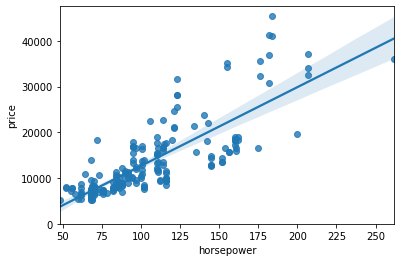

In [ ]:
#Regression plot between horsepower and price
sns.regplot(x='horsepower',y='price',data=df)
plt.ylim(0,)

(0.0, 47756.86653774407)

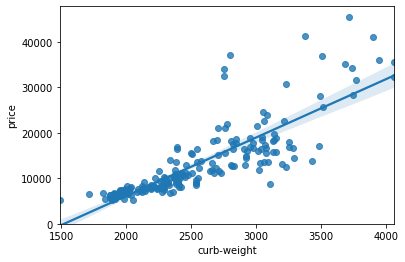

In [ ]:
#Regression plot between curb-weight and price
sns.regplot(x='curb-weight',y='price',data=df)
plt.ylim(0,)

(0.0, 53276.56199844601)

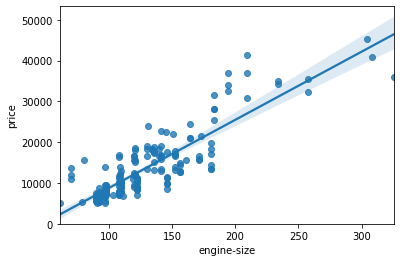

In [ ]:
#Rregression plot between engine-size and price
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

(10.0, 48174.45504512242)

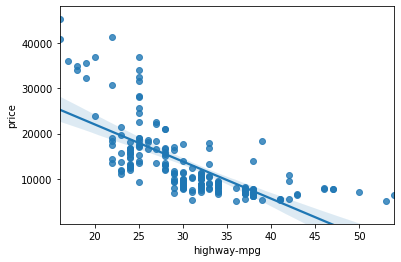

In [ ]:
#Regression plot between highway-mpg and price
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(10,)

In [ ]:
#Residual plot for model evaluation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


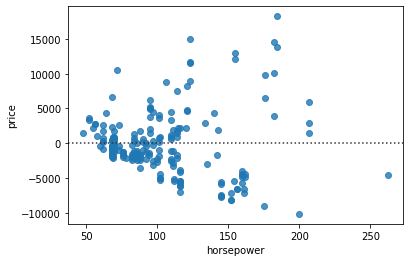

In [ ]:
#Residualplot between horsepower and price 
sns.residplot(df['horsepower'],df['price'])

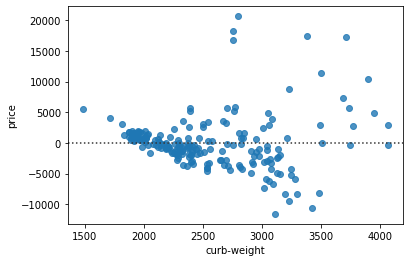

In [ ]:
#Residual plot of curb-weight and price
sns.residplot(x='curb-weight',y='price',data=df)

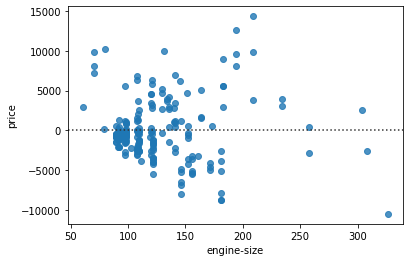

In [ ]:
#Residual plot of engine-size and price
sns.residplot(x='engine-size',y='price',data=df)

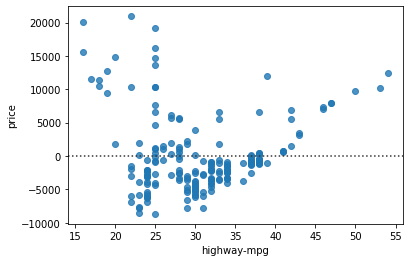

In [ ]:
#Residual plot of highway-mpg and price
sns.residplot(x='highway-mpg',y='price',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


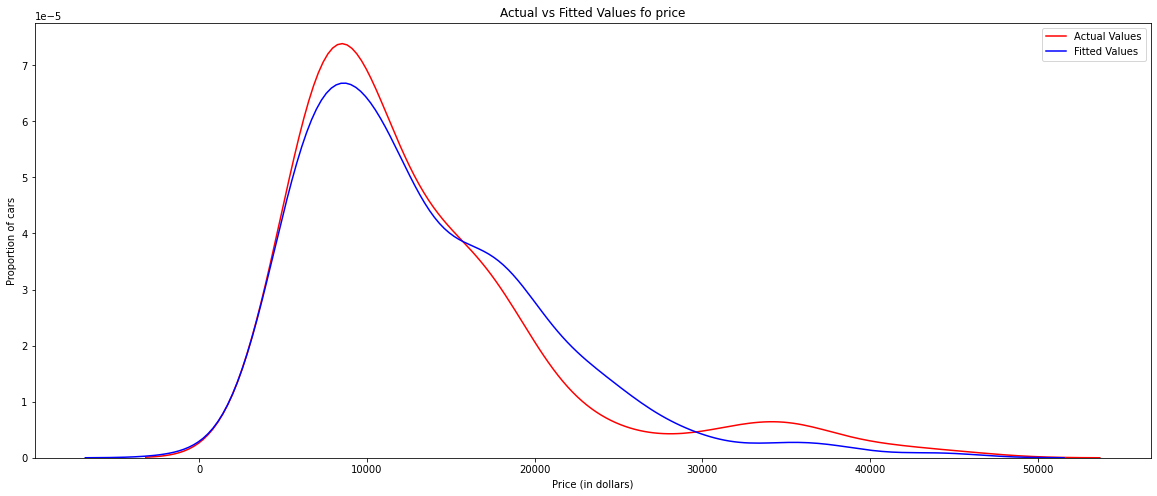

In [ ]:
#DISTRIBUTION PLOT FOR EVALUATING HOW SIMILAR ARE ACTUAL AND FITTED VALUES 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y_hat= lm.predict(Z)
plt.figure(figsize= (20,8))

#Plotting the graph 
ax1 = sns.distplot(df['price'], hist=False, label='Actual Values', color="r")
sns.distplot(y_hat, hist=False, color="b", label='Fitted Values', ax=ax1 )


#Labelling the graph
plt.title('Actual vs Fitted Values fo price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of cars')

plt.legend()
plt.show()
plt.close()



**We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement. 
Let's see if we can try fitting a polynomial model to the data instead.**

In [ ]:
#Defining the function for plotting the graph for polynomial function

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
#calculating 3rd degree polynomial 
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x,y,3)
p = np.poly1d (f)
print(p)


        3         2
-1.553 x + 204.3 x - 8948 x + 1.377e+05


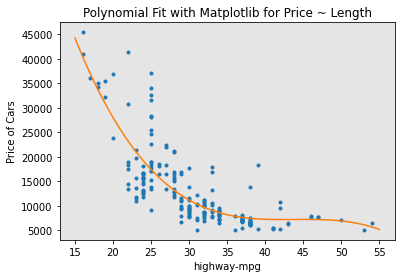

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')



**We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.**

In [ ]:
#Polynomial regression with more than one dimension (can't be performed by numpy's polyfit)

#Importing liabraries 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Creating a list of tuples, the first element is estimator, the second is the name of the estimator: model
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#Input the list in pipeline constructor 
pipe=Pipeline(Input)

pipe.fit(Z, y)

#Produce a prediction
ypipe=pipe.predict(Z)
ypipe[0:4]

#The method normalises the data, performs a polynomial transform and then outputs a prediction 


array([13139.52833211, 13139.52833211, 18274.67859543, 10428.86200312])

In [ ]:
X= df[['highway-mpg']]
Y= df['price']
lm.fit(X,Y)
print('The R-square is:',lm.score(X,Y))

The R-square is: 0.49734915602966895


In [ ]:
#Training and testing data 

#splitting data into training data and testing data. We will place target data in separate dataframe y
y_data= df['price']

#drop price data in x data
x_data= df.drop('price',axis=1)

#split data into training and testing data using the funtion train_test_split
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)  #testing set is 10% of total dataset

print('number of test samples:', x_test.shape[0])
print('number of training samples:', x_train.shape[0])

number of test samples: 20
number of training samples: 179


In [ ]:
#importing linear eregression from module linear_model
from sklearn.linear_model import LinearRegression

#create linear regression object
lre=LinearRegression()

#fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)

#Calculate R^2 on test data
print(lre.score(x_test[['horsepower']],y_test))

#we can see the R^2 is smaller using the test data
print(lre.score(x_train[['horsepower']], y_train))


0.5388443337445994
0.6555834266833747


In [ ]:
from sklearn.model_selection import cross_val_score

#input the object, feature, in this case hprespower, the target data (y_data). The parameter cv determines the number of folds, in this case, 4
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) 

#finding R^2 of each fold 
print(Rcross)

#mean and standard deviation of our estimate 
print('The mean of the folds are', Rcross.mean(), 'and the standard deviation is', Rcross.std())

#The function 'cross_val_predict to predict the object. The function splits the data into specified folds, using one fold for testing others for training 
#importing the function 
from sklearn.model_selection import cross_val_predict 

yhat = cross_val_predict(lre , x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

[0.77344651 0.53291315 0.72007907 0.04475435]
The mean of the folds are 0.5177982696090335 and the standard deviation is 0.28734672370921965


array([14184.73813347, 14184.73813347, 20864.83116721, 12786.57912641,
       14806.14213661])

In [ ]:
Rsqu_test= []
order=[1,2,3,4]
for n in order:
  pr= PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  lre.fit(x_train_pr, y_train)
  Rsqu_test.append(lre.score(x_test_pr, y_test))
  print(Rsqu_test)

[0.5388443337445994]
[0.5388443337445994, 0.5442481544562463]
[0.5388443337445994, 0.5442481544562463, 0.5121429200364087]
[0.5388443337445994, 0.5442481544562463, 0.5121429200364087, 0.5231108546570911]


In [ ]:
lr= LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)

#Prediction using training data
yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 5782.67809273, 28454.91041684, 34925.57616652,  6375.13950726,
        4047.53670667])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


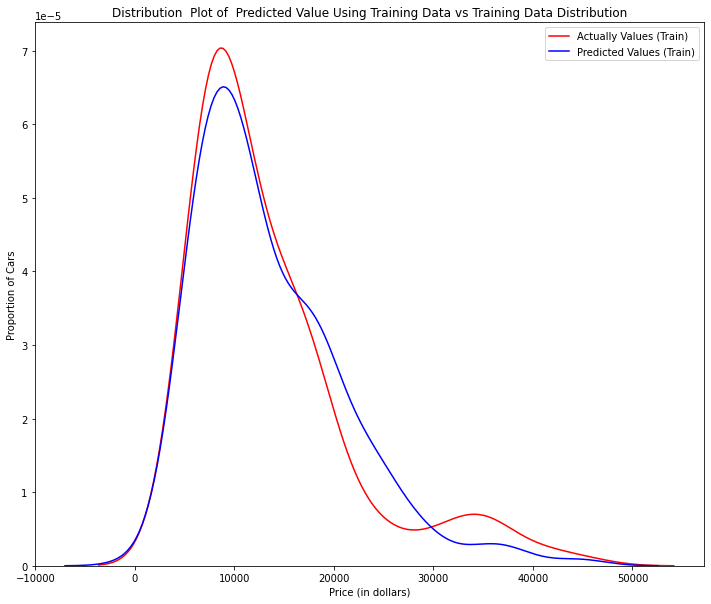

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train,'Actually Values (Train)','Predicted Values (Train)',Title)

[21521.44482593 11079.24287013  6337.31725039  6638.24991947
  5979.68752648]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


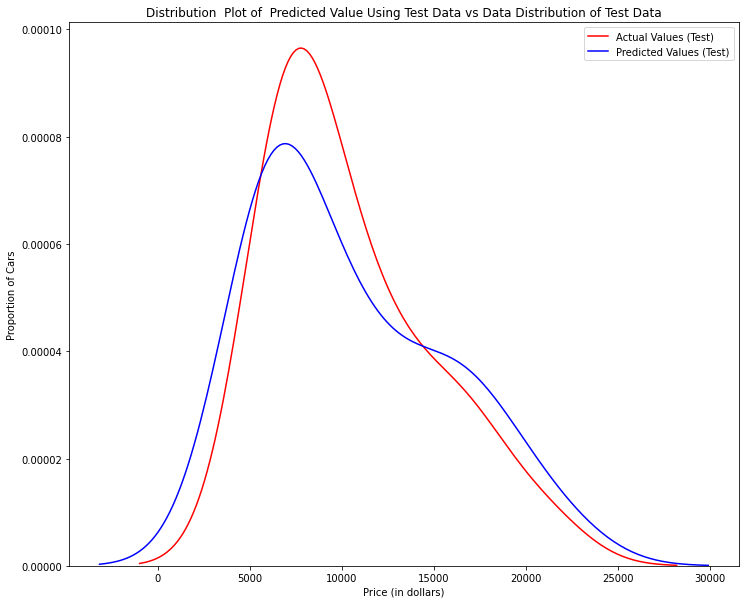

In [ ]:
yhat_test= lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
print(yhat_test[0:5])
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)